In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import rfft, rfftfreq, irfft
from scipy.signal import convolve

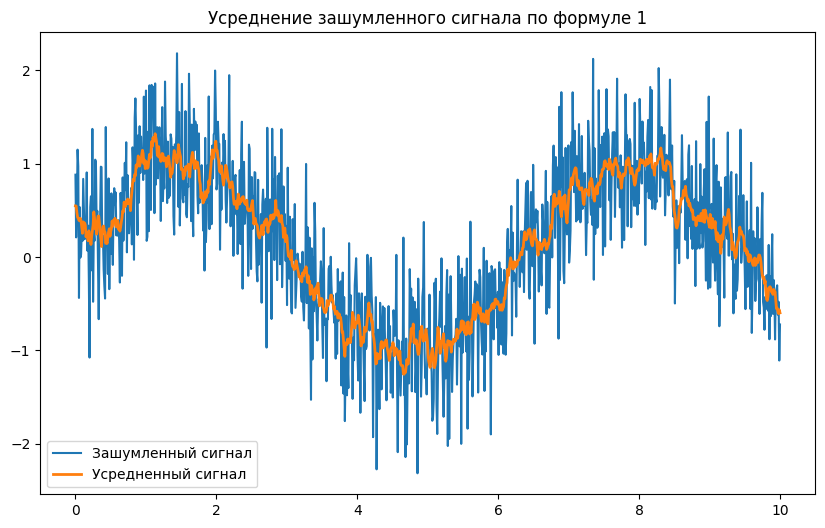

In [2]:
np.random.seed(0)
t = np.linspace(0, 10, 1000)
signal = np.sin(t) + np.random.normal(0, 0.5, 1000)

# Параметр усреднения
k = 5

# Усреднение по формуле 1
def moving_average(signal, k):
    n = len(signal)
    y = np.zeros(n)
    for i in range(n):
        start = max(0, i - k)
        end = min(n, i + k + 1)
        y[i] = np.mean(signal[start:end])
    return y

averaged_signal = moving_average(signal, k)

# Вывод результатов
plt.figure(figsize=(10, 6))
plt.plot(t, signal, label='Зашумленный сигнал')
plt.plot(t, averaged_signal, label='Усредненный сигнал', linewidth=2)
plt.legend()
plt.title('Усреднение зашумленного сигнала по формуле 1')
plt.show()

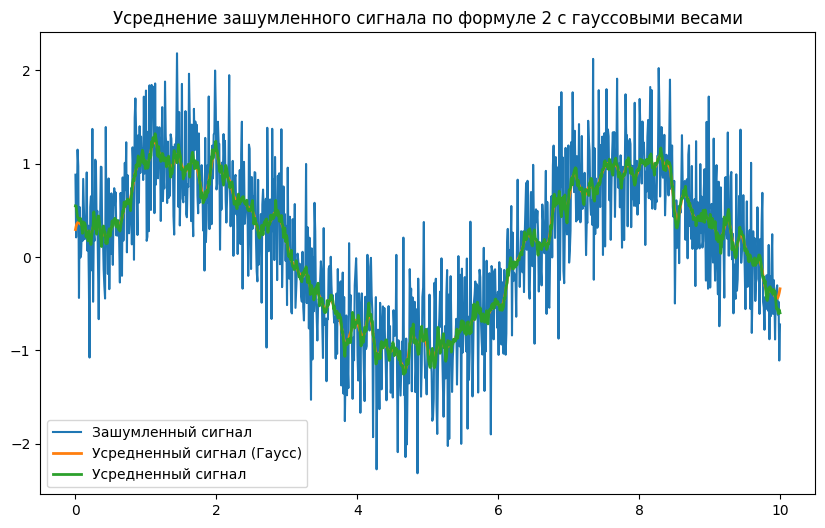

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Генерация зашумленного сигнала
np.random.seed(0)
t = np.linspace(0, 10, 1000)
signal = np.sin(t) + np.random.normal(0, 0.5, 1000)

# Параметр усреднения
k = 5
omega = 2

# Усреднение по формуле 2 с гауссовыми весами
def gaus_smooth(y, omega=10, k=10):
    omega = 10 # параметр Гауссова ядра
    window_len = 2*k+1

    # создаем Гауссово ядро
    t_g = np.arange(window_len) - k
    gauss_kernel = np.exp(-4*np.log(2)*t_g**2 / omega**2)
    gauss_kernel /= gauss_kernel.sum() # нормализуем ядро

    y_smoothed = convolve(y, gauss_kernel, mode='same')
    yff_smoothed = rfft(y_smoothed)
    return y_smoothed, yff_smoothed

averaged_signal_gaussian, averaged_signal_gaussian_ff = gaus_smooth(signal)

# Вывод результатов
plt.figure(figsize=(10, 6))
plt.plot(t, signal, label='Зашумленный сигнал')
plt.plot(t, averaged_signal_gaussian, label='Усредненный сигнал (Гаусс)', linewidth=2)
plt.plot(t, averaged_signal, label='Усредненный сигнал', linewidth=2)
plt.legend()
plt.title('Усреднение зашумленного сигнала по формуле 2 с гауссовыми весами')
plt.show()

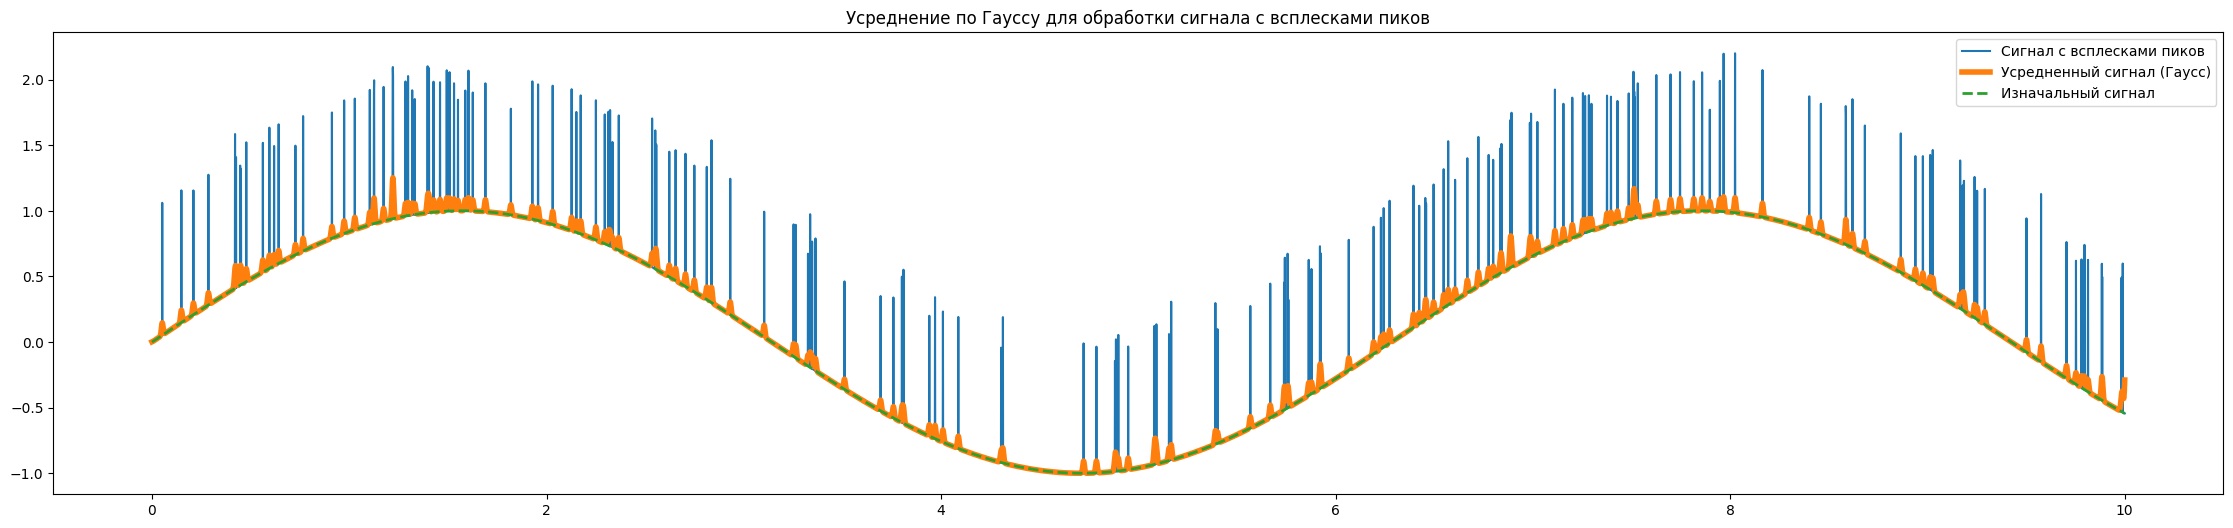

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# Генерация сигнала с всплесками пиков
np.random.seed(0)
t = np.linspace(0, 10, 10000)
signal = np.sin(t)
peaks = np.random.choice([0, 1], size=10000, p=[0.98, 0.02]) * np.random.normal(1, 0.1, 10000)
signal_with_peaks = signal + peaks

# Параметр усреднения
k = 5
sigma = 2

# Усреднение по Гауссу
averaged_signal_gaussian_peaks, _ = gaus_smooth(signal_with_peaks, omega = 100, k = 100)

# Вывод результатов
plt.figure(figsize=(28, 6))
plt.plot(t, signal_with_peaks, label='Сигнал с всплесками пиков')
plt.plot(t, averaged_signal_gaussian_peaks, label='Усредненный сигнал (Гаусс)', linewidth=4)
plt.plot(t, signal, label='Изначальный сигнал', linewidth=2, linestyle='--')
plt.legend()
plt.title('Усреднение по Гауссу для обработки сигнала с всплесками пиков')
plt.show()

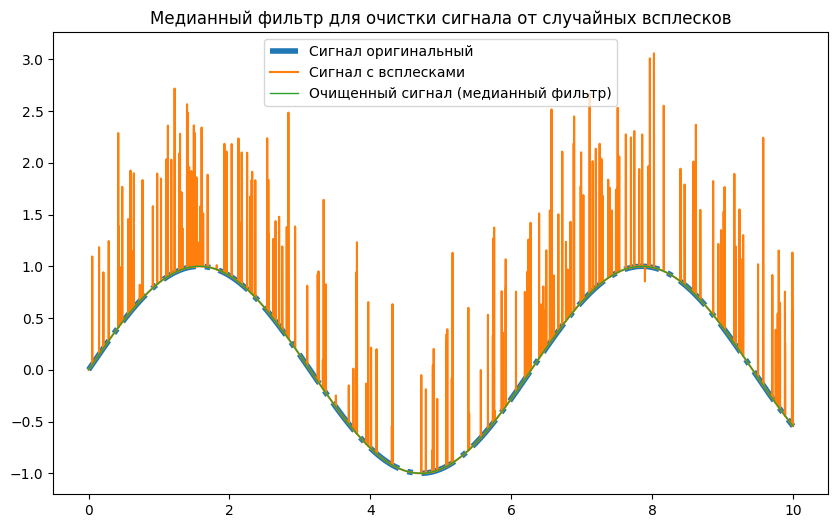

In [68]:
import numpy as np
import matplotlib.pyplot as plt

# Генерация сигнала с случайными всплесками
np.random.seed(0)
t = np.linspace(0, 10, 10000)
signal = np.sin(t)
spikes = np.random.choice([0, 1], size=10000, p=[0.98, 0.02]) * np.random.normal(1, 0.5, 10000)
signal_with_spikes = signal + spikes

# Собственный медианный фильтр
def median_filter(signal, window_size):
    n = len(signal)
    filtered_signal = np.zeros(n)
    half_window = window_size // 2
    for i in range(n):
        start = max(0, i - half_window)
        end = min(n, i + half_window + 1)
        filtered_signal[i] = np.median(signal[start:end])
    return filtered_signal

# Применение медианного фильтра
window_size = 6
filtered_signal = median_filter(signal_with_spikes, window_size)

# Вывод результатов
plt.figure(figsize=(10, 6))
plt.plot(t, signal, label='Сигнал оригинальный', linestyle = '-.', linewidth=4)
plt.plot(t, signal_with_spikes, label='Сигнал с всплесками')
plt.plot(t, filtered_signal, label='Очищенный сигнал (медианный фильтр)', linewidth=1)
plt.legend()
plt.title('Медианный фильтр для очистки сигнала от случайных всплесков')
plt.show()

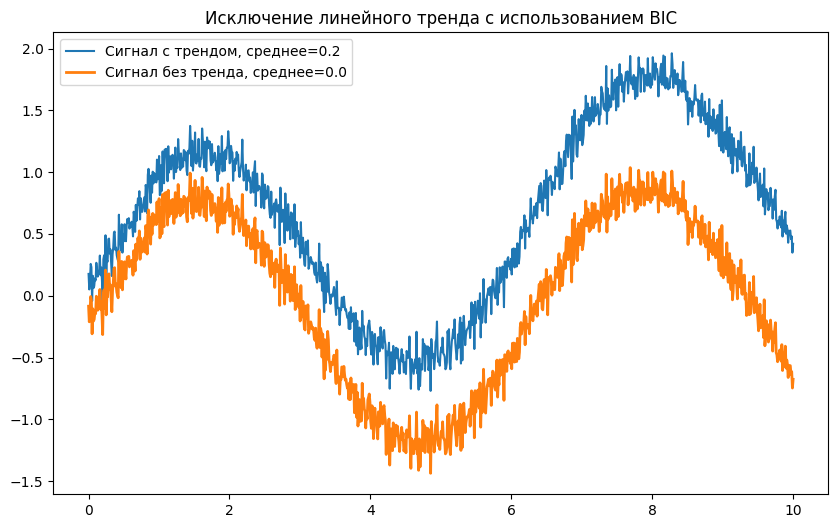

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Генерация сигнала с линейным трендом
np.random.seed(0)
t = np.linspace(0, 10, 1000)
trend = 0.1 * t
signal_with_trend = np.sin(t) + trend + np.random.normal(0, 0.1, 1000)

# Функция для вычисления BIC
def calculate_bic(signal, model, k):
    residuals = signal - model
    n = len(signal)
    sigma2 = np.var(residuals)
    bic = n * np.log(sigma2) + k * np.log(n)
    return bic

# Подгонка линейной модели
def linear_model(t, a, b):
    return a * t + b

popt, _ = curve_fit(linear_model, t, signal_with_trend)
trend_model = linear_model(t, *popt)

# Исключение тренда
signal_without_trend = signal_with_trend - trend_model

# Вывод результатов
plt.figure(figsize=(10, 6))
plt.plot(t, signal_with_trend, label='Сигнал с трендом, среднее={:.1f}'.format(np.mean(signal)))
plt.plot(t, signal_without_trend, label='Сигнал без тренда, среднее={:.1f}'.format(np.mean(signal_without_trend)), linewidth=2)
plt.legend()
plt.title('Исключение линейного тренда с использованием BIC')
plt.show()